In [48]:
import pandas as pd
import openpyxl
import matplotlib
import matplotlib.pyplot as plt
f = 'success_tnums.xlsx'
xl = pd.ExcelFile(f)
pas = []
gps = []
rmsds = []

In [11]:
wb = openpyxl.load_workbook(f)
for s in xl.sheet_names:
    if s != 'PAs' and s!= 'Arrays' and s!= '1aym':
        content = pd.read_excel(f, sheet_name=s)
        cols = content.columns
        pas.append(content[cols[0]][0])
        rmsds.append(content[cols[1]][0])
        gps.append(content[cols[4]][0])

In [17]:
def countlist(l):
    clist = dict()
    for i in l:
        clist[i] = clist.get(i, 0) + 1
    return clist
def avglist(l):
    return sum(l) / len(l)

In [21]:
gp_counts = countlist(gps)

gp_rmsd = {}
for i, g in enumerate(gps):
    if g in gp_rmsd.keys():
        gp_rmsd[g].append(rmsds[i])
    else:
        gp_rmsd[g] = [rmsds[i]]
gp_avg = {str(gp):sum(v)/len(v) for gp, v in gp_rmsd.items()}

pa_counts = {str(k):v for k,v in countlist(pas).items()}

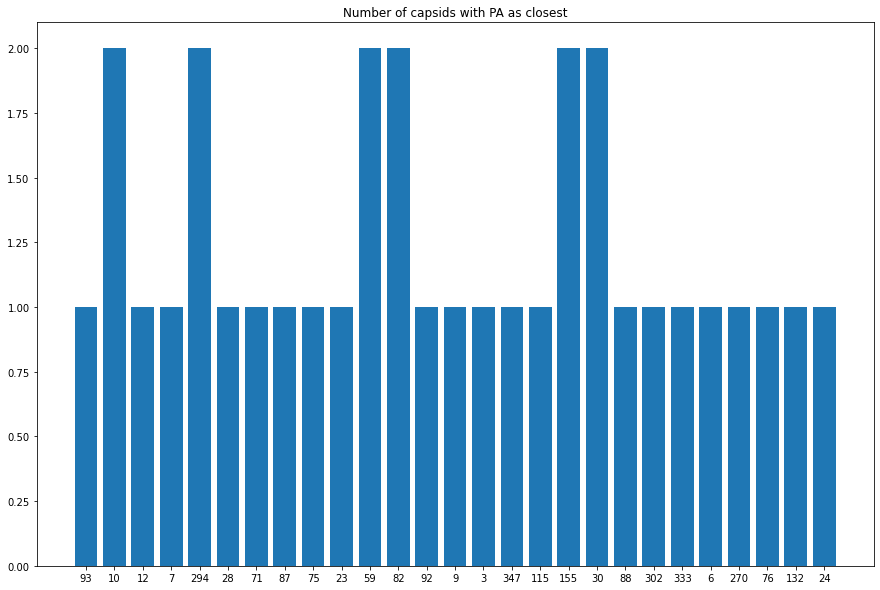

In [41]:
#Number of capsids with PA as closest (bar)
matplotlib.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()
ax.set_title('Number of capsids with PA as closest')
plt.bar(*zip(*pa_counts.items()))
plt.show() 

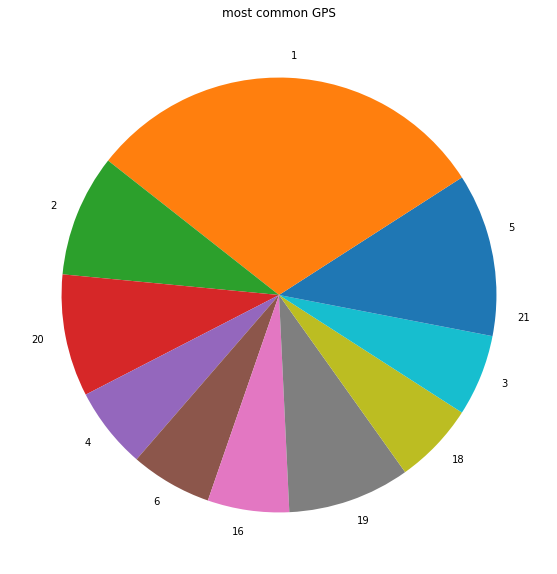

In [42]:
#common GPs (pie)
matplotlib.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
ax.set_title('most common GPS')
counts = list(gp_counts.values())
labels = list(gp_counts.keys())
plt.pie(counts, labels=labels)
plt.show()

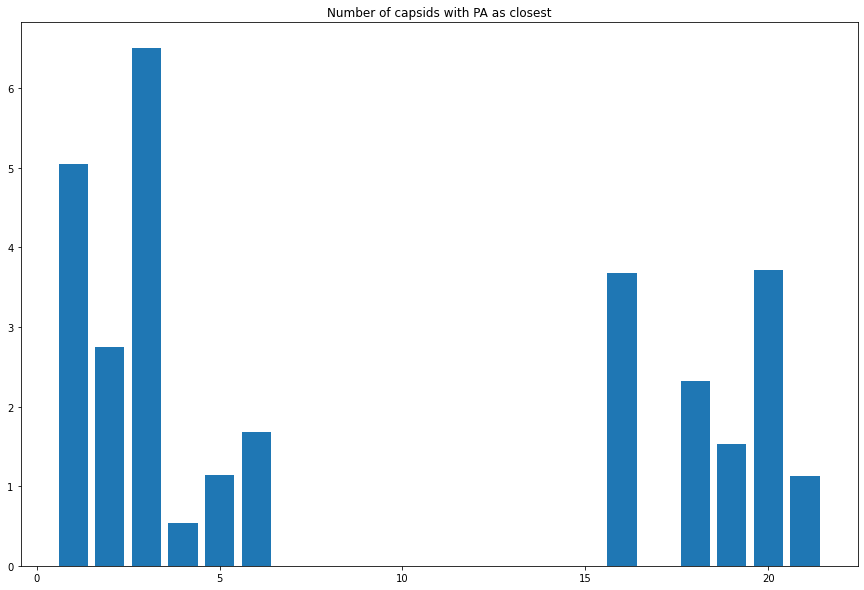

In [43]:
#Avg distance from GPs
matplotlib.rcParams['figure.figsize'] = [15, 10]
fig, ax = plt.subplots()
ax.set_title("Avg distance from GP when it's closest")
plt.bar(*zip(*gp_avg.items()))
plt.show() 